In [1]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib as mp


def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

In [2]:
connection = create_server_connection("127.0.0.1", "root", "")

MySQL Database connection successful


# Biblioteca SQL

A biblioteca utilizada para aplicação de SQL é proveniente do link: https://www.freecodecamp.org/news/connect-python-with-sql/

De forma simples, as funções realizam a conexão com o Banco de Dados e executam os Querys. 

>>"SELECT*FROM classicmodels.products

>>WHERE quantityInStock > 3000;"



In [4]:
def create_database(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database created successfully")
    except Error as err:
        print(f"Error: '{err}'")

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection


def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

# Leitura dos dados

Para ler os dados deve-se criar uma conexão e logo em seguida utiliza-la para executar e ler o Query. Observe o exemplo abaixo, ele realiza a conexão com a base, depois seleciona da base de dados classicmodels e extrai a tabela de pagamentos.

In [5]:
q1 = """
SELECT*FROM classicmodels.payments;
"""

connection = create_db_connection("localhost", "root", "", "")
results = read_query(connection, q1)

MySQL Database connection successful


# Processamento de Dados Após a Leitura


In [92]:

pagamentos = pd.DataFrame(results, columns=["CustomerNumber", "checkNumber", "paymentDate", "Amount"])

In [94]:

# Split Paymente Data

##Converte para String
pagamentos["paymentDate"] = pagamentos["paymentDate"].astype('str')
pagamentos.info()

#Split ANO - MES e DATA
Split_Pay = pagamentos.paymentDate.str.split("-", expand = True)
Split_Pay = Split_Pay.rename(columns={0: "Ano", 1: "Mes", 2: "Dia"})
pagamentos = pd.concat([Split_Pay, pagamentos],axis = 1)

print(pagamentos["Ano"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerNumber  273 non-null    int64 
 1   checkNumber     273 non-null    object
 2   paymentDate     273 non-null    object
 3   Amount          273 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.7+ KB
0      2004
1      2003
2      2004
3      2004
4      2003
       ... 
268    2003
269    2004
270    2005
271    2003
272    2004
Name: Ano, Length: 273, dtype: object


In [115]:
Anos = pagamentos["Ano"].unique()

SumYear = dict()
for i in Anos:
    SumYear[i] = pagamentos.loc[pagamentos["Ano"]==i,"Amount"].sum()

# Função para Plot dos Gráficos

In [16]:
import matplotlib.pyplot as plt

def plot_grafico_linha(valores_x, valores_y, eixo_x_legenda, eixo_y_legenda, label = None,):
    plt.plot(valores_x, valores_y, linewidth = 2, label = label)
    plt.xlabel(eixo_x_legenda)
    plt.ylabel(eixo_y_legenda)


def plot_grafico_barra(valores_x, valores_y, eixo_x_legenda, eixo_y_legenda, label = None,):
    plt.bar(valores_x, valores_y, linewidth = 2, label = label)
    plt.xticks( rotation=45, horizontalalignment='right')
    plt.xlabel(eixo_x_legenda)
    plt.ylabel(eixo_y_legenda)


# Análise Pagamentos

A partir da base de dados classicmodels extraídas do SQL, foi possível identificar que os pagamentos cairam ao longo de 3 anos. 

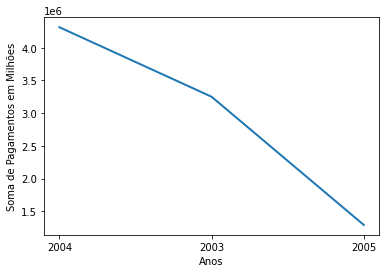

In [223]:
plot_grafico_linha(list(SumYear.keys()), list(SumYear.values()), "Anos", "Soma de Pagamentos em Milhões")

## Relação entre Clientes e Representantes de Vendas

Com consulta de SQL entre as Tabelas Customers e Employees será relacionado quais clientes pertencem a cada representante de vendas. 

Para relacionar a Tabela de Clientes com os dados dos funcionários, foi utilizado o comando JOIN. 

```
select salesRepEmployeeNumber, customerName, firstName, lastName, country, creditLimit FROM classicmodels.customers AS C
JOIN classicmodels.employees AS E ON C.salesRepEmployeeNumber = E.employeeNumber;
```

O comando retornara a junção entre as duas tabelas com o código do vendedor e o código do empregado. 

In [6]:
q2 = "select salesRepEmployeeNumber, customerName, firstName, lastName, country, creditLimit FROM classicmodels.customers AS C JOIN classicmodels.employees AS E ON C.salesRepEmployeeNumber = E.employeeNumber;"


connection = create_db_connection("localhost", "root", "", "")
results = read_query(connection, q2)



MySQL Database connection successful


In [7]:
Clientes_Vendedores = pd.DataFrame(results, columns = ["salesRepEmployeeNumber", "customerName", "firstName", "lastName", "country", "creditLimit"])

In [9]:
Clientes_Vendedores.info()
Clientes_Vendedores["customerName"].astype(str)
Clientes_Vendedores["firstName"].astype(str)
Clientes_Vendedores["lastName"].astype(str)
Clientes_Vendedores["country"].astype(str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   salesRepEmployeeNumber  100 non-null    int64 
 1   customerName            100 non-null    object
 2   firstName               100 non-null    object
 3   lastName                100 non-null    object
 4   country                 100 non-null    object
 5   creditLimit             100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


0             USA
1             USA
2             USA
3             USA
4             USA
         ...     
95    Switzerland
96          Spain
97    Switzerland
98          Spain
99          Spain
Name: country, Length: 100, dtype: object

## Relação de Vendedores com maior número de Clientes

Para isso foi utilizado o seguinte comando do pandas

```
Vendedores = Clientes_Vendedores["firstName"].value_counts().to_dict()

```

Assim, os valores contados foram armazenados em um dicionário. 

A partir da análise, identificou que Leslie é o maior vendedor com 12 clientes, seguido de Pamela e Barry. 

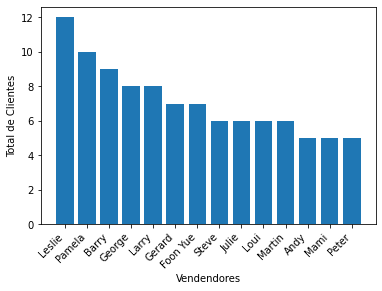

In [17]:
Vendedores = Clientes_Vendedores["firstName"].value_counts().to_dict()

plot_grafico_barra(list(Vendedores.keys()), list(Vendedores.values()), "Vendendores", "Total de Clientes")

A análise de Países mostra uma predominância dos EUA. 

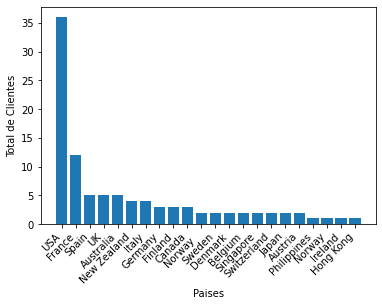

In [20]:
Paises = Clientes_Vendedores["country"].value_counts().to_dict()

plot_grafico_barra(list(Paises.keys()), list(Paises.values()), "Paises", "Total de Clientes")